In [2]:
import pandas as pd

# Dataset overview

## Dataset:

The dataset consists of 373 samples. Each sample is associated with a target class label encoded as follows:

1 : PET, 2 : HDPE, 3 : PVC, 4 : LDPE, 5 : PP, 6 : PS, 7 : Other, 8 : Unknown

It is up to you how you will handle the unknown class. In addition, the samples are associated with three categorical descriptors: color, transparency, and recording device identifier. 

The device recorded 3 values per wavelength k: spectrum_k + 740, wr_raw_k + 740, sample_raw_k + 740. "wr" stands for "white reference" and device internally processes wr_raw_k and sample_raw_k to produce spectrum_k values, which we used for our analysis. Specifically, the processing is:

<center> spectrum_k = sample_raw_k / wr_raw_k </center>

This normalizes the sample’s light absorption to remove variations caused by external lighting.

## Context:

Spectroscopy: technique used to analyze materials based on how they interact with light. Different types of plastic absorb, reflect, or transmit light in different ways.

Wavelength: the distance between two consecutive peaks or troughs of a wave.

Different wavelengths are used depending on the substance being measured and this can vary depending on the substances state (solid, liquid, gas) as well as the type of substance it is (biological, organic, inorganic, etc.,) Therefore, wavelength matters in spectroscopy and the right one has to be selected to get the best results.


In [3]:
# Import dataset
df = pd.read_csv('Data Fusion Assignment 2025 Data.csv')
df.head() # 373 samples, 998 features

,class,id,color,transparency,device_id,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,...,sample_raw_321 + 740,sample_raw_322 + 740,sample_raw_323 + 740,sample_raw_324 + 740,sample_raw_325 + 740,sample_raw_326 + 740,sample_raw_327 + 740,sample_raw_328 + 740,sample_raw_329 + 740,sample_raw_330 + 740
0,1,1,white,o,B0236F1F2D02C632,0.782157,0.754932,0.730555,0.709195,0.690707,...,5.54,5.32,5.08,4.80,4.50,4.16,3.80,3.42,3.00,2.55
1,1,2,white,o,B0236F1F2D02C632,0.948156,0.947904,0.947607,0.947237,0.946815,...,6.08,5.84,5.57,5.27,4.94,4.57,4.18,3.75,3.29,2.80
2,1,4,none,s,B0236F1F2D02C632,0.285657,0.285247,0.284841,0.284432,0.284022,...,1.47,1.42,1.35,1.28,1.20,1.11,1.01,0.91,0.80,0.68
3,1,5,none,s,B0236F1F2D02C632,0.296280,0.295966,0.295631,0.295269,0.294887,...,1.65,1.58,1.51,1.43,1.34,1.24,1.13,1.02,0.89,0.76
4,1,6,none,t,B0236F1F2D02C632,0.171568,0.171535,0.171500,0.171459,0.171414,...,1.31,1.26,1.20,1.14,1.07,0.99,0.90,0.81,0.71,0.61


In [4]:
# Print column names
print(df.columns)

Index(['class', 'id', 'color', 'transparency', 'device_id', 'spectrum_0 + 740',
       'spectrum_1 + 740', 'spectrum_2 + 740', 'spectrum_3 + 740',
       'spectrum_4 + 740',
       ...
       'sample_raw_321 + 740', 'sample_raw_322 + 740', 'sample_raw_323 + 740',
       'sample_raw_324 + 740', 'sample_raw_325 + 740', 'sample_raw_326 + 740',
       'sample_raw_327 + 740', 'sample_raw_328 + 740', 'sample_raw_329 + 740',
       'sample_raw_330 + 740'],
      dtype='object', length=998)


We have records from spectrum 0 to spectrum 330, everyone "+ 740". So, the dataset records spectral values from 740 nm to 1070 nm at 1 nm intervals across 331 wavelengths.

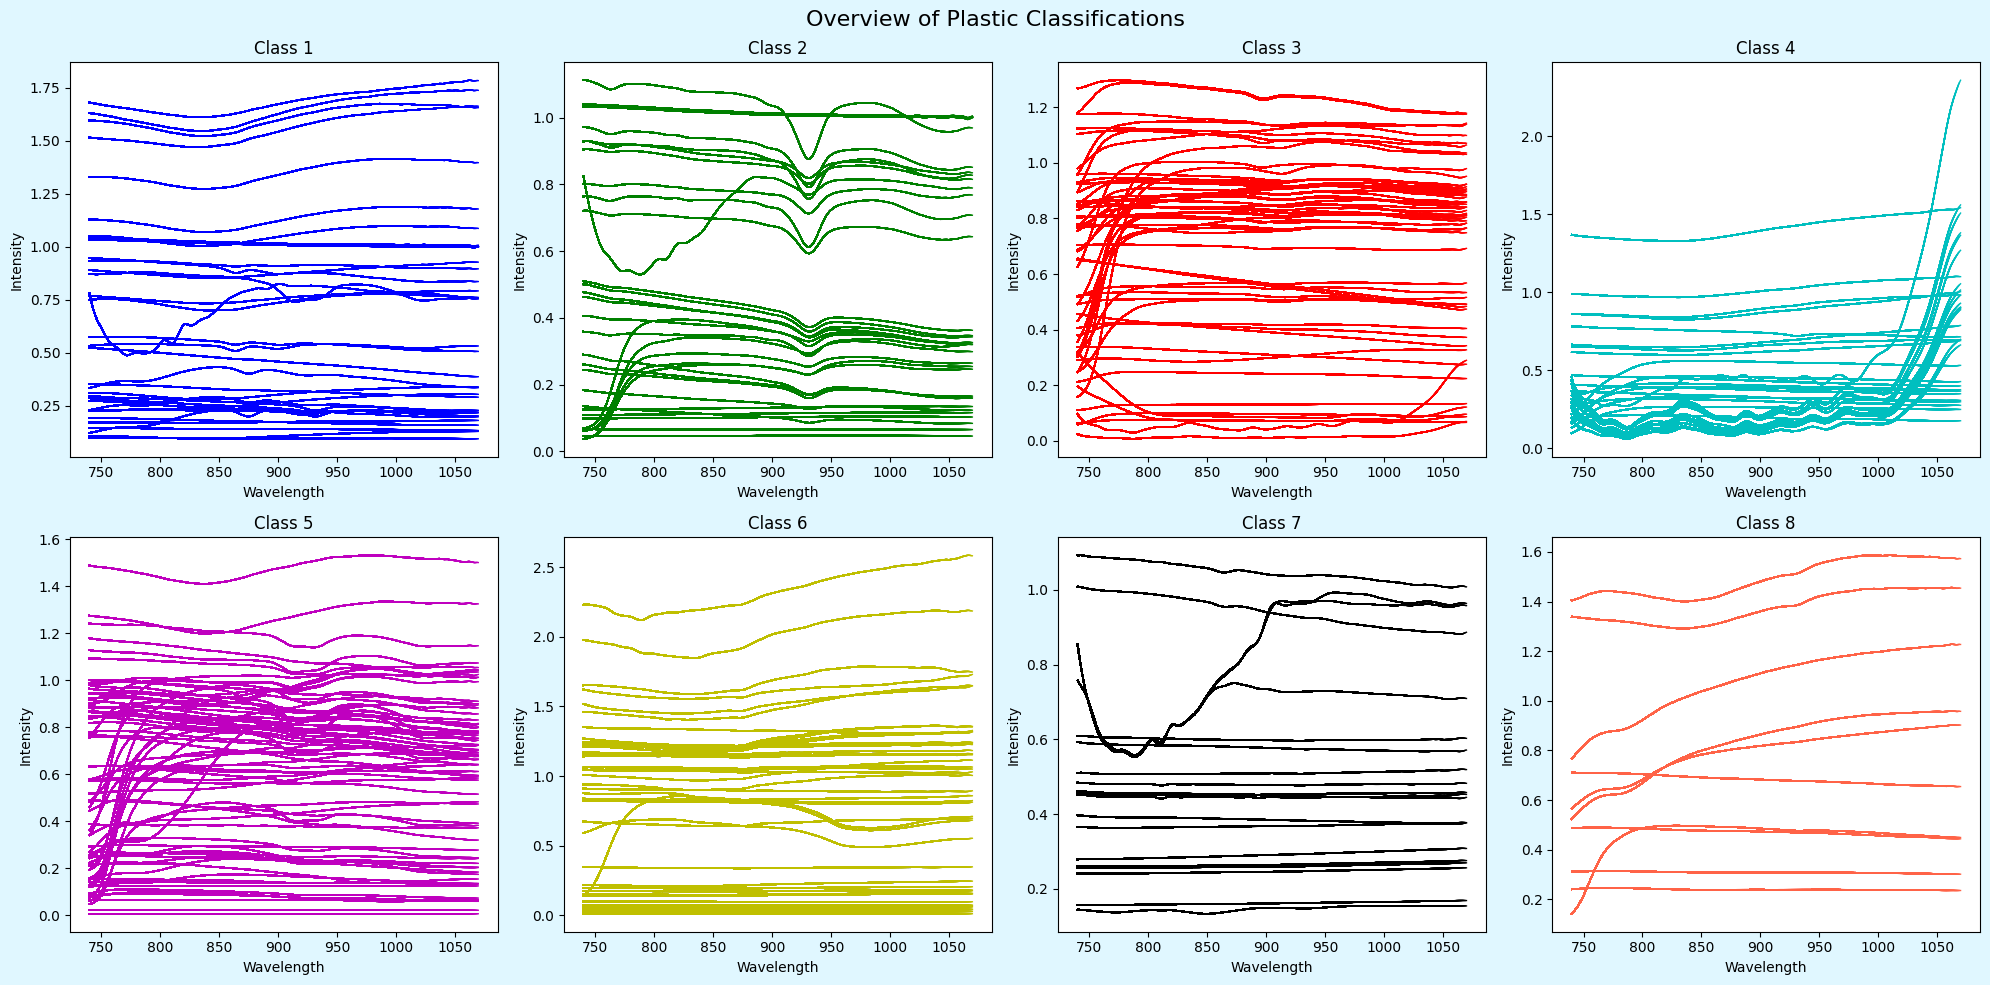

In [44]:
#Make plot with x axis as value k and y value as the column value 
import matplotlib.pyplot as plt



#SEPERATE BY CLASS

class_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF6347']

#columns_to_select = [col for col in df.columns if col.startswith('spectrum_')]

# Create the subplots grid (2x4 grid for 8 graphs)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

fig.patch.set_facecolor('#E0F7FF')

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

#For all classifications of plastic types
for i in range (1,9):

    ax = axes[i-1]

    #Plot figure size
   
    #For each row in the data frame
    for index, row in df.iterrows():

        class_rows = []
        columns_to_select = [col for col in df.columns if col.startswith('spectrum_')]

        #Get data of selected spectrum k columns to create line
        for column in columns_to_select:
            class_rows.append(row[column])

            #If row belongs to classification i
            if row['class'] == i:
                #Plot Line

                ax.plot(range(740, len(class_rows)+ 740), class_rows, linewidth=1, label=row['class'], color=class_colors[row['class']-1])  

    ax.set_title(f'Class {i}')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Intensity')

# Add the overall title for the entire figure
fig.suptitle('Overview of Plastic Classifications', fontsize=16)

plt.tight_layout()
plt.show()










unique_values


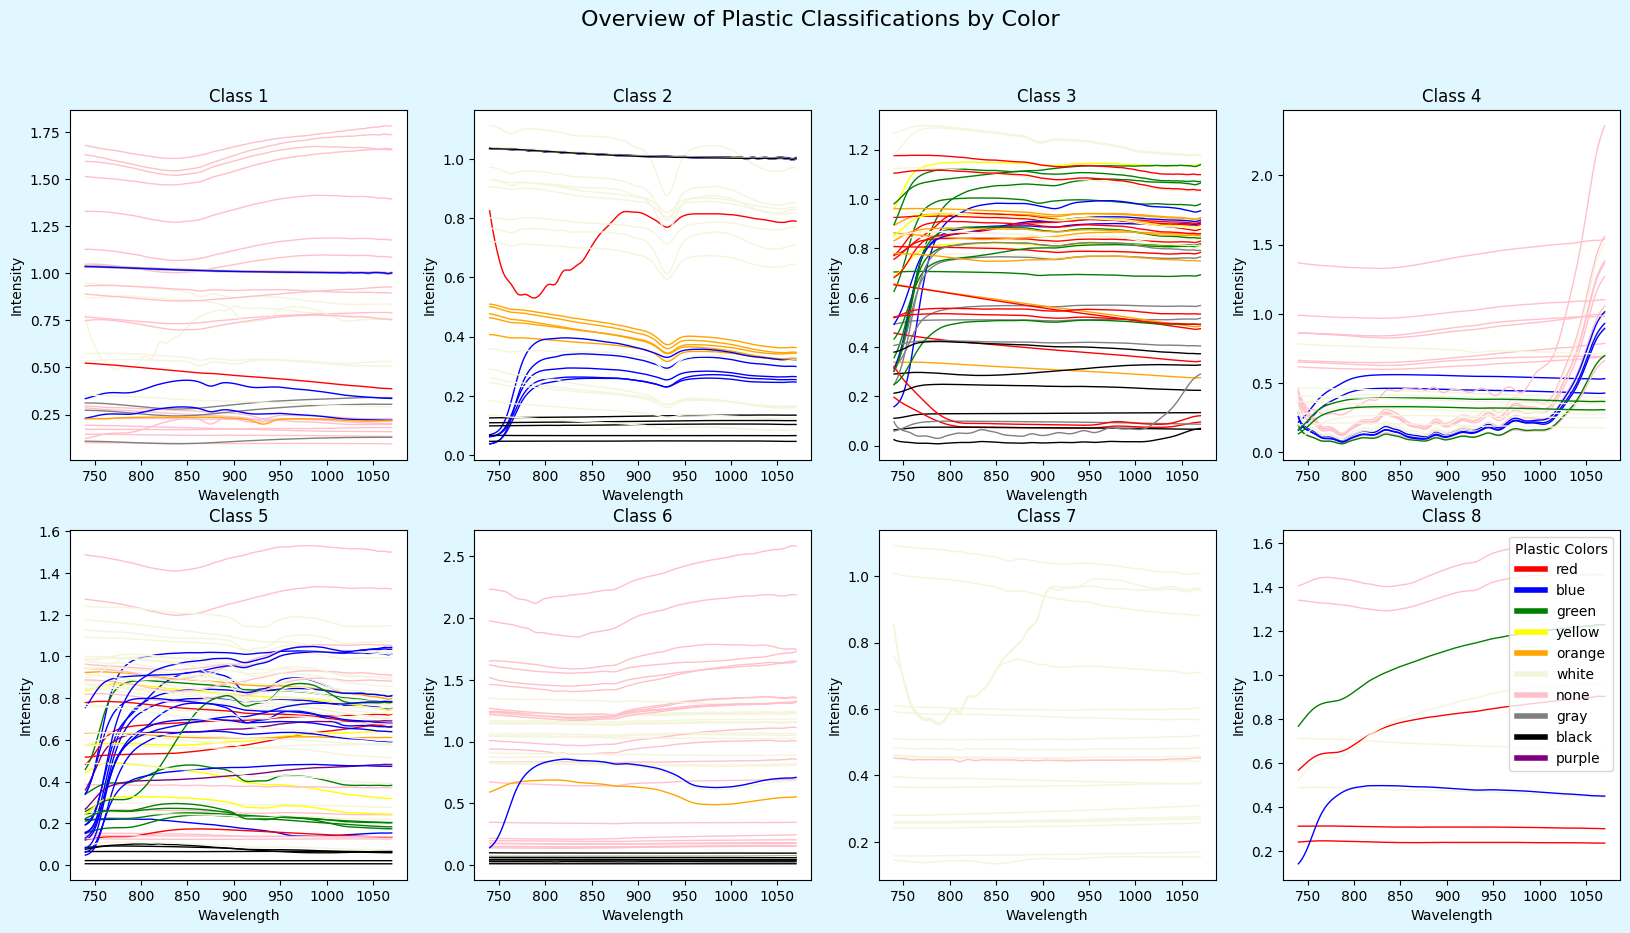

In [45]:
#BY COLOR
class_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF6347']

#columns_to_select = [col for col in df.columns if col.startswith('spectrum_')]

unique_values = df['color'].unique()

print('unique_values')

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Define your color map for the classes
class_colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']  # Example colors

# Create a color map for plastic types or use any other color mapping method
color_map = {'red': 'red', 'blue': 'blue', 'green': 'green', 'yellow': 'yellow', 'orange': 'orange', 'white': '#F5F5DC', 'none': 'pink', 'gray': 'gray', 'black': 'black', 'purple': 'purple'}  # Example color map


legend_handles = [Line2D([0], [0], color=color, lw=4, label=color_name) for color_name, color in color_map.items()]

# Create the subplots grid (2x4 grid for 8 graphs)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

fig.patch.set_facecolor('#E0F7FF')

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Loop through the classes 1 to 8
for i in range(1, 9):

    # Plot figure size
    ax = axes[i-1]

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        
        # Initialize the list of selected spectrum columns
        class_rows = []
        columns_to_select = [col for col in df.columns if col.startswith('spectrum_')]

        # Get data of selected spectrum k columns to create the line
        for column in columns_to_select:
            class_rows.append(row[column])

        # If row belongs to classification i
        if row['class'] == i:
            
            # Get color based on row['color']
            line_color = color_map.get(row['color'], 'black')  # Default to black if color is not found in color_map

            # Plot line
            ax.plot(range(740, len(class_rows) + 740), class_rows, linewidth=1, label=f"Class {i} - {row['color']}", color=line_color)

    ax.set_title(f'Class {i}')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Intensity')
    #plt.legend()
    #plt.legend(handles=color_map, title="Plastic Colors")
    plt.legend(handles=legend_handles, title="Plastic Colors", loc='upper right')

# Add the overall title for the entire figure
fig.suptitle('Overview of Plastic Classifications by Color', fontsize=16)

plt.tight_layout
plt.show()


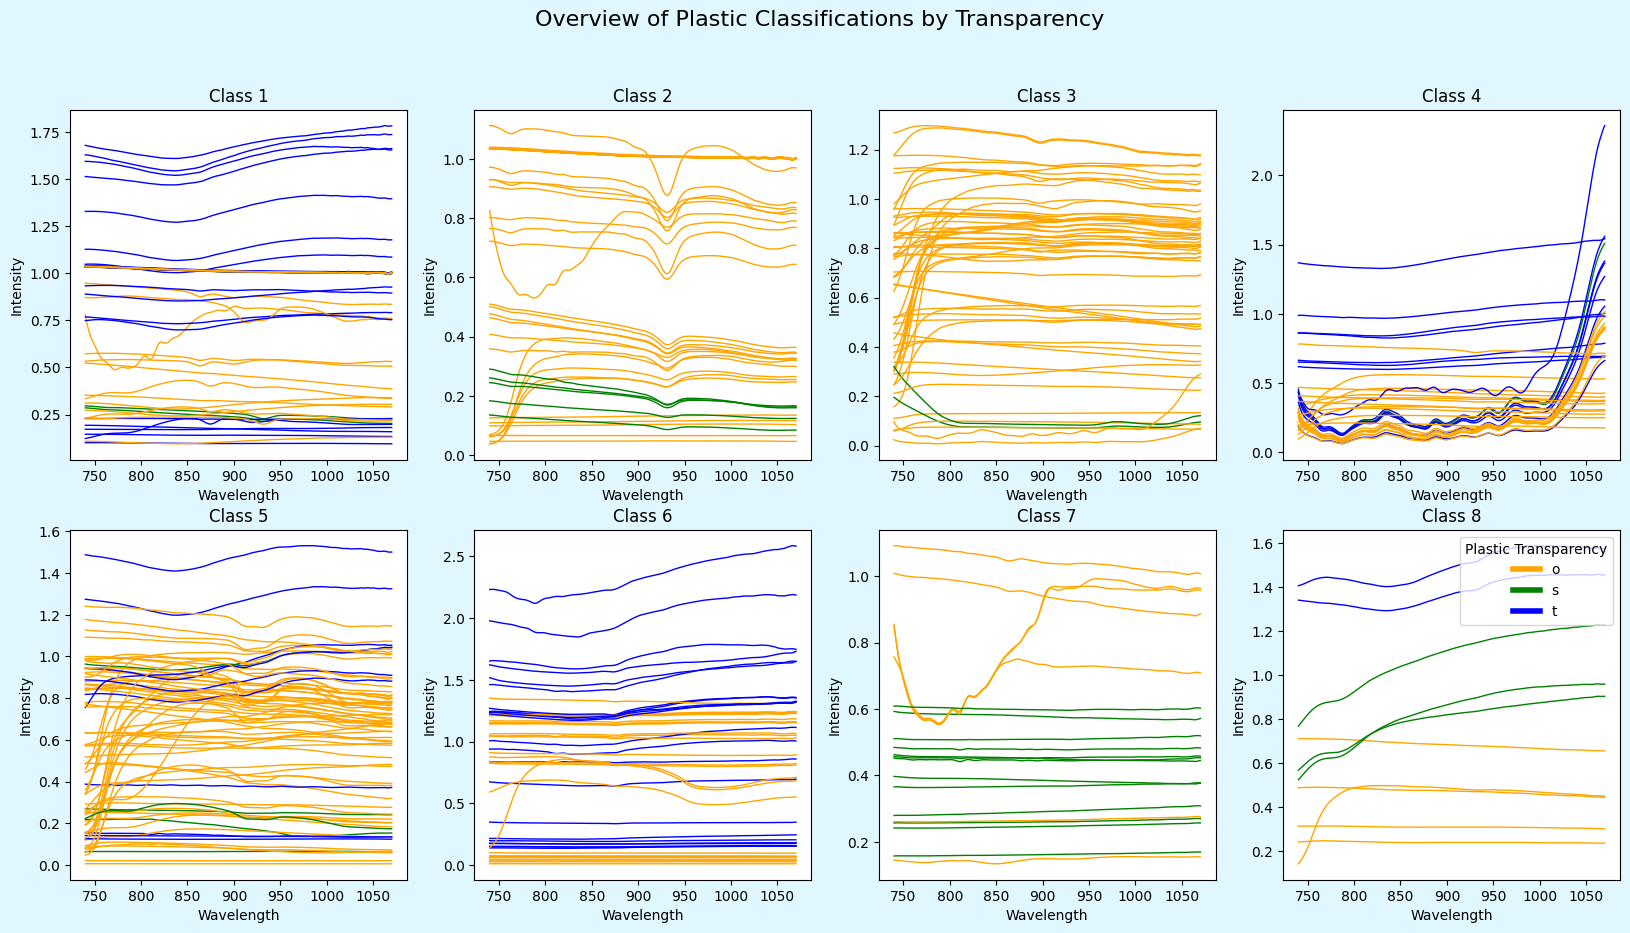

In [46]:
#BY TRANSPARENCY

from matplotlib.lines import Line2D
    
unique_values = df['transparency'].unique()

# Create a color map for plastic types or use any other color mapping method
color_map = {'o': 'orange', 's': 'green', 't':'blue'}  # Example color map


legend_handles = [Line2D([0], [0], color=color, lw=4, label=color_name) for color_name, color in color_map.items()]

# Create the subplots grid (2x4 grid for 8 graphs)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

fig.patch.set_facecolor('#E0F7FF')

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Loop through the classes 1 to 8
for i in range(1, 9):

    # Plot figure size
    ax = axes[i-1]

    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        
        # Initialize the list of selected spectrum columns
        class_rows = []
        columns_to_select = [col for col in df.columns if col.startswith('spectrum_')]

        # Get data of selected spectrum k columns to create the line
        for column in columns_to_select:
            class_rows.append(row[column])

        # If row belongs to classification i
        if row['class'] == i:
            
            # Get color based on row['color']
            line_color = color_map.get(row['transparency'], 'black')  # Default to black if color is not found in color_map

            # Plot line
            ax.plot(range(740, len(class_rows) + 740), class_rows, linewidth=1, label=f"Class {i} - {row['transparency']}", color=line_color)

    ax.set_title(f'Class {i}')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Intensity')
    #plt.legend()
    #plt.legend(handles=color_map, title="Plastic Colors")
    plt.legend(handles=legend_handles, title="Plastic Transparency", loc='upper right')

# Add the overall title for the entire figure
fig.suptitle('Overview of Plastic Classifications by Transparency', fontsize=16)

plt.tight_layout
plt.show()
